## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

## Import Data

In [2]:
data_laptops = pd.read_csv("Data Laptops Combine.csv")

## Data Cleaning : Drop Unwanted Columns that Contain Null Values

In [3]:
data_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Laptop Brand        1015 non-null   object 
 1   Price               1015 non-null   float64
 2   Series              1013 non-null   object 
 3   Device Type         976 non-null    object 
 4   OS                  1015 non-null   object 
 5   Dimensions          880 non-null    object 
 6   Weight              938 non-null    object 
 7   Warranty            1015 non-null   int64  
 8   Type                971 non-null    object 
 9   Touch               1015 non-null   object 
 10  Size                1012 non-null   object 
 11  Resolution          1014 non-null   object 
 12  PPI                 1011 non-null   object 
 13  Anti Glare Screen   1015 non-null   object 
 14  Features            816 non-null    object 
 15  Ethernet            780 non-null    object 
 16  HDMI  

In [4]:
# Store all the columns which already had no missing values to a new dataframe temporarily
# At this step, I was going to deal with columns that still had missing values
no_null_datas = pd.DataFrame()
for i in data_laptops.columns:
    if data_laptops[i].isnull().sum() == 0:
        no_null_datas = pd.concat([no_null_datas, data_laptops[i]], axis=1)
        data_laptops.drop(i, axis=1, inplace=True)

In [5]:
null_columns_list = list(data_laptops.isnull().sum().sort_values(ascending=False).index)
data_laptops.isnull().sum().sort_values(ascending=False)

Ethernet              235
Battery               224
Headphone Jack        201
Features              199
Sales Package         195
Keyboard              146
Dimensions            135
Speakers              123
Weight                 77
Keyboard Backlit       75
Solid State Drive      54
Type                   44
Generation             41
Device Type            39
Microphone In          33
HDMI                   32
Dedicated Memory       28
Cache                  25
Inbuilt Microphone     21
Speed                   6
PPI                     4
Size                    3
Series                  2
Resolution              1
dtype: int64

In [6]:
data_laptops[null_columns_list].head(8).transpose()

,0,1,2,3,4,5,6,7
Ethernet,10/100/1000 GbE LAN,Yes,Yes,100/1000M,No,Integrated 10/100/1000 GbE LAN\n,100/1000M,NaN
Battery,3 Cell Battery,3 Cell Battery,3 Cell Battery,NaN,NaN,4 Cell Battery,NaN,3 cell Cell Battery
Headphone Jack,Yes,NaN,NaN,NaN,Yes,Yes,NaN,NaN
Features,Full HD WLED-Backlit IPS Micro-edge Display (B...,NaN,NaN,"Refresh Rate: 120 Hz, 45% NTSC, DC dimmer",300nit Brightness,NaN,"250nits , 60Hz, 45% NTSC, DC dimmer",NaN
Sales Package,"Laptop, Power Adaptor, User Guide, Warranty Do...","Laptop, Power Adaptor, User Guide, Warranty Do...","Laptop, Power Adaptor, User Guide, Warranty Do...","Laptop, Power Adaptor, Quick Start Guide, Warr...","Laptop, Battery, Power Adaptor, User Guide, Wa...",NaN,"Laptop, Battery, Adapter, Cables and User Manuals","Laptop, Battery, Power Adapter, User Guide"
Keyboard,"Full-size, Ultra Violet Backlit, Shadow Black ...",99- 100- 103-key Acer with international langu...,99- 100- 103-key Acer with international langu...,"White Backlit, English, Yes",Yes,"Full-size, Ceramic White Keyboard With Numeric...","White Backlit, English, Yes","Red , Yes"
Dimensions,360 x 257 x 23.5 mm,362.3 x 237.4 x 19.9 mm,362.3 x 237.4 x 19.9 mm,359.6 x 251.9 x 24.2 mm,358 x 248 x 20 mm,NaN,359.6 x 251.9 x 24.2 mm,359 x 254 x 21.7 mm
Speakers,Built-in Dual Speakers,Built In Dual Stereo Speakers,Built In Dual Stereo Speakers,Built-in Dual Stereo speakers,Built-in Speaker,Dual speakers,speakers Two built-in stereo speakers,Built-in Dual Speakers
Weight,1.98 kg,2.1 kg,2.1 kg,2.25 kg,1.8 kg,NaN,2.25 kg,1.86 kg
Keyboard Backlit,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [7]:
## Drop unwanted list, This was listed based on their significancy to a laptop gaming and missing values they had.
drop_lists = ["Battery","Headphone Jack",
"Features","Sales Package","Keyboard","Speakers","Keyboard Backlit","HDMI","Microphone In","Inbuilt Microphone",
"Dedicated Memory","Cache","Series"]
data_laptops.drop(drop_lists, axis=1, inplace=True)

In [8]:
data_laptops.head(5)

,Device Type,Dimensions,Weight,Type,Size,Resolution,PPI,Ethernet,Speed,Generation,Solid State Drive
0,Netbook,360 x 257 x 23.5 mm,1.98 kg,IPS,15.6 inches,1920 x 1080 pixels,~ 141,10/100/1000 GbE LAN,"3.3 GHz, Hexa Core Turbo Boost Upto 4.2 GHz",5th Gen,512 GB
1,Netbook,362.3 x 237.4 x 19.9 mm,2.1 kg,"Full HD, IPS",15.6 inches,1920 x 1080 pixels,~ 141,Yes,"3.3 GHz, 12 Core",12th Gen,512 GB
2,Netbook,362.3 x 237.4 x 19.9 mm,2.1 kg,"Full HD, IPS",15.6 inches,1920 x 1080 pixels,~ 141,Yes,"3.3 GHz, 12 Core Turbo Boost Upto 4.4 GHz",12th Gen,512 GB
3,Netbook,359.6 x 251.9 x 24.2 mm,2.25 kg,"Full HD, IPS, 250nits",15.6 inches,1920 x 1080 pixels,~ 141,100/1000M,"2.5 GHz, Quad Core Turbo Boost Upto 3.2 GHz",11th Gen,256 GB
4,Netbook,358 x 248 x 20 mm,1.8 kg,IPS,16 inches,1200 x 1920 pixels,~ 283,No,"3.3 GHz, Hexa Core Turbo Boost Upto 4.2 GHz",5th Gen,512 GB


## Data Wrangling : Fill Missing Values and Delete Some Unrequired Features

In [9]:
data_laptops_final = pd.concat([data_laptops, no_null_datas], axis=1)

In [10]:
# A few features below contained less than 10 missing values, I was just going to drop the rows with missing values
data_laptops_final = data_laptops_final[(data_laptops_final['Resolution'].notnull()) &
                                        (data_laptops_final['GPU'].notnull()) &
                                        (data_laptops_final['Size'].notnull()) &
                                        (data_laptops_final['PPI'].notnull()) &
                                        (data_laptops_final['Speed'].notnull())]

In [11]:
data_laptops_final.loc[:, data_laptops_final.isnull().any()].isnull().sum().sort_values(ascending=False)

Ethernet             230
Dimensions           126
Weight                71
Solid State Drive     51
Generation            41
Type                  40
Device Type           38
dtype: int64

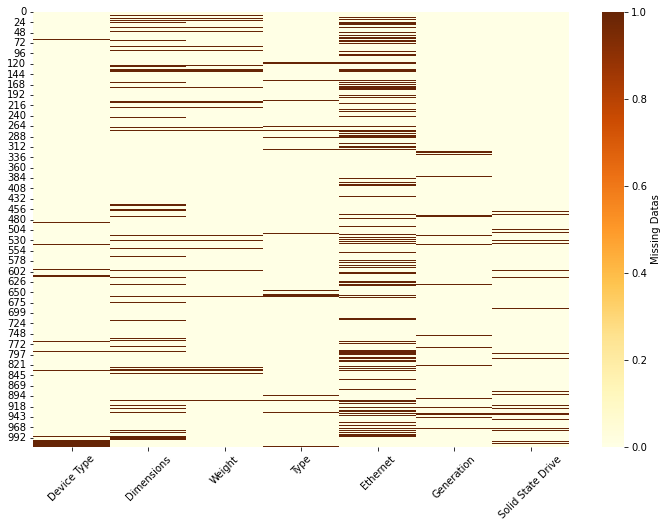

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(data_laptops_final.loc[:, data_laptops_final.isnull().any()].isnull(), cmap='YlOrBr', cbar_kws={'label':'Missing Datas'})
plt.xticks(rotation=45);

In [13]:
data_laptops_final['Ethernet'].value_counts()

No                                                                   216
10/100/1000 Mbps                                                     119
Yes                                                                   69
Integrated 10/100/1000 GbE LAN                                        29
Available                                                             28
                                                                    ... 
Killer Ethernet E2600, 10/100/1000 Mbps                                1
Killer E3100 RJ-45 2.5G                                                1
Killer Ethernet E3100G                                                 1
Killer Ethernet E2600 (10/100/1000 Mbps with Wake-on-LAN Support)      1
10/100/100 Gigabit Ethernet                                            1
Name: Ethernet, Length: 62, dtype: int64

In [14]:
data_laptops_final['Ethernet'].fillna(method = 'ffill', inplace = True)

In [15]:
def convertEthernet(a):
    if str(a).lower() == "no":
        return "No"
    else:
        return "Yes"
data_laptops_final['Ethernet'] = [convertEthernet(x) for x in data_laptops_final['Ethernet']]

In [16]:
data_laptops_final['Dimensions'].nunique()

295

In [17]:
data_laptops_final.drop('Dimensions', axis=1, inplace=True)

In [18]:
data_laptops_final['Weight'] = data_laptops_final['Weight'].apply(lambda x: float(x.split()[0]) if type(x) != float else x)
data_laptops_final = data_laptops_final[data_laptops_final['Weight'] != 2200]
data_laptops_final['Weight'].fillna(data_laptops_final['Weight'].median(), inplace=True)
data_laptops_final['Weight'] = data_laptops_final['Weight'].round(2)

In [19]:
data_laptops_final['Solid State Drive'].value_counts()

512 GB    445
1 TB      316
256 GB    132
2 TB       30
128 GB     27
4 TB        2
3 TB        1
Name: Solid State Drive, dtype: int64

In [20]:
data_laptops_final['Solid State Drive'].fillna(method = 'ffill', inplace = True)

In [21]:
data_laptops_final['Solid State Drive'] = data_laptops_final['Solid State Drive'].apply(lambda x: int(x.split()[0])*1024 if len(x.split()[0]) == 1 else int(x.split()[0]))

In [22]:
data_laptops_final['Solid State Drive'].value_counts()

512     471
1024    324
256     143
128      33
2048     30
4096      2
3072      1
Name: Solid State Drive, dtype: int64

In [23]:
data_laptops_final['Generation'].value_counts()

11th Gen    177
10th Gen    175
5th Gen     150
12th Gen    126
4th Gen      94
9th Gen      90
6th Gen      69
8th Gen      54
7th Gen      22
3rd Gen       7
Name: Generation, dtype: int64

In [24]:
data_laptops_final['Generation'].fillna(method = 'ffill', inplace = True)

In [25]:
data_laptops_final['Generation'] = data_laptops_final['Generation'].apply(lambda x: int(x.split()[0][:2]) if len(x.split()[0]) == 4 else int(x.split()[0][0]))

In [26]:
data_laptops_final['Generation'].value_counts()

11    182
10    182
5     151
12    127
9     106
4      96
6      70
8      61
7      22
3       7
Name: Generation, dtype: int64

In [27]:
data_laptops_final['Type'].value_counts()

LED                                                           189
LED                                                           182
IPS                                                            82
IPS                                                            81
IPS-level                                                      26
                                                             ... 
FHD+ LED-Backlit LCD,                                           1
FHD+ LED-Backlit                                                1
UHD+ LED-Backlit LCD                                            1
WQHD, Backlit LCD, IPS-level                                    1
Full HD LED Backlit Ultra Slim 300-nits Anti-glare Display      1
Name: Type, Length: 183, dtype: int64

In [28]:
data_laptops_final['Type'].nunique()

183

In [29]:
data_laptops_final.drop('Type', axis=1, inplace=True)

In [30]:
data_laptops_final['Device Type'].value_counts()

Netbook      919
Ultrabook     34
Hybrid        13
Name: Device Type, dtype: int64

In [31]:
data_laptops_final['Device Type'].fillna(data_laptops_final['Device Type'].mode()[0], inplace=True)

In [32]:
data_laptops_final.isnull().sum().sum()

0

## Data Wrangling : Convert Dtype of Some Variables

In [33]:
data_laptops_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 1014
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Device Type        1004 non-null   object 
 1   Weight             1004 non-null   float64
 2   Size               1004 non-null   object 
 3   Resolution         1004 non-null   object 
 4   PPI                1004 non-null   object 
 5   Ethernet           1004 non-null   object 
 6   Speed              1004 non-null   object 
 7   Generation         1004 non-null   int64  
 8   Solid State Drive  1004 non-null   int64  
 9   Laptop Brand       1004 non-null   object 
 10  Price              1004 non-null   float64
 11  OS                 1004 non-null   object 
 12  Warranty           1004 non-null   int64  
 13  Touch              1004 non-null   object 
 14  Anti Glare Screen  1004 non-null   object 
 15  Camera             1004 non-null   object 
 16  Optical Drive      1004 non-n

In [34]:
change_lists = ('Ethernet','Touch','Anti Glare Screen', 'Camera', 'Optical Drive')
for i in change_lists:
    data_laptops_final[i] = [1 if x == "Yes" else 0 for x in data_laptops_final[i]]

In [35]:
data_laptops_final['Size'].unique()

array(['15.6 inches', '16 inches', '17.3 inches', '16.1 inches',
       '17.32 inches', '14 inches', '13.4 inches', '13.3 inches',
       '21 inches', '17 inches', '18.4 inches'], dtype=object)

In [36]:
data_laptops_final['Size'] = [float(x.split()[0]) for x in data_laptops_final['Size']]

In [37]:
data_laptops_final['Resolution'].unique()

array(['1920 x 1080 pixels', '1200 x 1920 pixels', '2560 x 1600 pixels',
       '2560 x 1440 pixels', '1920 x 1200 pixels', '1080 x 1920 pixels',
       '3840 x 2400 pixels', '3840 x 2160 pixels', '3072 x 1920 pixels',
       '2880 x 1800 pixels', '1366 x 768 pixels', '3480 x 2160 pixels',
       '2560 x 1080 pixels', '1980 x 1080 pixels'], dtype=object)

In [38]:
data_laptops_final['PPI'].unique()

array(['~ 141', '~ 283', '~ 137', '~ 127', '~ 184', '~ 188', '~ 182',
       '~ 142', '~ 157', '~ 216', '~ 189', '~ 169', '~ 170', '~ 338',
       '~ 255', '~ 145', '~ 282', '~ 210', '~ 226', '~ 243', '~ 118',
       '~ 166', '~ 237', '~ 100', '~ 132', '~ 266', '~ 161', '~ 112',
       '~ 120'], dtype=object)

In [39]:
data_laptops_final['PPI'] = [int(x.split()[-1]) for x in data_laptops_final['PPI']]

In [40]:
data_laptops_final['Speed'].unique()

array(['3.3 GHz, Hexa Core Turbo Boost Upto 4.2 GHz', '3.3 GHz, 12 Core',
       '3.3 GHz, 12 Core Turbo Boost Upto 4.4 GHz',
       '2.5 GHz, Quad Core Turbo Boost Upto 3.2 GHz',
       '3.3 GHz, Octa Core Turbo Boost Upto 4.4 GHz',
       '2.3 GHz, Octa Core Turbo Boost Upto 4.6 GHz',
       '2.6 GHz, Octa Core',
       '3.1 GHz, Quad Core Turbo Boost Upto 4.4 GHz',
       '2.2 GHz, Hexa Core Turbo Boost Upto 4.5 GHz',
       '12 Core Turbo Boost Upto 4.4 GHz',
       '3 GHz, Hexa Core Turbo Boost Upto 4 GHz',
       '4.4 GHz, Quad Core Turbo Boost Upto 4.4 GHz',
       '3.2 GHz, Octa Core Turbo Boost Upto 4.4 GHz',
       'Deca Core Turbo Boost Upto 4.7 GHz',
       '2.5 GHz, Quad Core Turbo Boost Upto 4.5 GHz',
       '3.5 GHz, Octa Core Turbo Boost Upto 4.7 GHz',
       '3 GHz, 14 Core Turbo Boost Upto 4.7 GHz',
       '3.2 GHz, Octa Core Turbo Boost Upto 4.7 GHz',
       '3 GHz Turbo Boost Upto 4.7 GHz',
       '2.4 GHz, Hexa Core Turbo Boost Upto 4.2 GHz',
       '4.2 GHz, Hexa 

In [41]:
def tryFloat(a):
    try:
        float(a)
        return True
    except ValueError:
        return False
def convertSpeed(a):
    if tryFloat(a.split()[0]):
        return float(a.split()[0])
    else:
        return None
def convertMaxspeed(a):
    if tryFloat(a.split()[-2]):
        return float(a.split()[-2])
    else:
        return None

data_laptops_final['Max Speed'] = [convertMaxspeed(x) for x in data_laptops_final['Speed']]
data_laptops_final['Speed'] = [convertSpeed(x) for x in data_laptops_final['Speed']]


<AxesSubplot:>

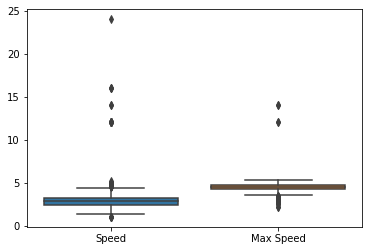

In [42]:
sns.boxplot(data=data_laptops_final[['Speed', 'Max Speed']])

In [43]:
data_laptops_final['Max Speed'] = data_laptops_final['Max Speed'].apply(lambda x: x if x <10 else None)
data_laptops_final['Speed'] = data_laptops_final['Speed'].apply(lambda x: x if x <10 else None)

In [44]:
data_laptops_final[(data_laptops_final['Speed'].isnull() == True) & data_laptops_final['Max Speed'].isnull() == True]

,Device Type,Weight,Size,Resolution,PPI,Ethernet,Speed,Generation,Solid State Drive,Laptop Brand,...,Camera,Optical Drive,Processor,Brand,GPU,RAM,USB Type-C,USB 3.0,USB 2.0,Max Speed
447,Netbook,2.3,15.6,1920 x 1080 pixels,141,0,NaN,10,512,Dell,...,1,0,Intel Core i5,NVIDIA,NVIDIA GeForce GTX 1650Ti,8 GB DDR4,0,0,0,NaN
448,Netbook,2.3,15.6,1920 x 1080 pixels,141,0,NaN,10,512,Acer,...,1,0,AMD Ryzen 5,NVIDIA,NVIDIA GeForce GTX 1650,8 GB DDR4,0,2,0,NaN
470,Netbook,2.4,15.6,1920 x 1080 pixels,141,1,NaN,10,256,Acer,...,1,0,AMD Ryzen 5,NVIDIA,NVIDIA GeForce RTX 3060,16 GB DDR4,1,1,0,NaN
517,Netbook,2.3,15.6,1920 x 1080 pixels,141,1,NaN,9,1024,ASUS,...,0,0,AMD Ryzen 7,NVIDIA,GeForce RTX 2060,32 GB DDR4,1,2,0,NaN


In [45]:
data_laptops_final.dropna(subset=['Speed', 'Max Speed'], thresh=1, inplace=True)

In [46]:
def fillSpeed(a,b):
    if math.isnan(a):
        return b
    else:
        return a
def fillMaxSpeed(a,b):
    if math.isnan(b):
        return a
    else:
        return b
data_laptops_final['Speed'] = data_laptops_final.apply(lambda x: fillSpeed(x['Speed'], x['Max Speed']), axis=1)
data_laptops_final['Max Speed'] = data_laptops_final.apply(lambda x: fillMaxSpeed(x['Speed'], x['Max Speed']), axis=1)

In [47]:
data_laptops_final.isnull().sum().sum()

0

In [48]:
data_laptops_final['GPU'].unique()

array(['NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 3050',
       'AMD Radeon Vega 7', 'NVIDIA GTX1650 Max-Q',
       'NVIDIA GeForce GTX 1650 ', 'NVIDIA GeForce RTX 2050',
       'NVIDIA Geforce GTX1650 Max Q', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce RTX 3050 Ti', 'AMD Radeon RX 6650M',
       'NVIDIA GeForce GTX 3050', 'AMD Radeon RX5500M',
       'NVIDIA GEFORCE RTX 3070 Ti', 'NVIDIA GeForce RTX 3070Ti',
       'NVIDIA Geforce GTX 1650', 'NVIDIA GeForce GTX 1650 Max-Q',
       'NVIDIA GeForce RTX 3080Ti', 'NVIDIA GeForce GTX1650',
       'AMD Radeon RX 5500M', 'NVIDIA GeForce RTX 3070 Ti',
       'AMD Radeon RX 6600M', 'Nvidia RTX 3050',
       'NVIDIA GeForce RTX 3070', 'Intel Iris Xe Graphics',
       'AMD Radeon RX 6800S', 'NVIDIA GeForce RTX3050',
       'NVIDIA Geforce RTX 3050', 'NVIDIA GeForce RTX RTX3050',
       'NVIDIA GeForce RTX RTX 3060', 'NVIDIA GeForce RTX 3050 Graphics',
       'NVIDIA GeForce 1650Ti', 'NVIDIA GeForce GTX Graphics GTX 1650',
       'NVIDI

In [49]:
data_laptops_final['GPU'].value_counts()

NVIDIA GeForce RTX 3050          128
NVIDIA GeForce GTX 1650          122
NVIDIA GeForce RTX 3060          112
NVIDIA Geforce GTX 1650           45
NVIDIA GeForce RTX 3050 Ti        41
                                ... 
AMD Radeon RX 6650M Graphics       1
NVIDIA GeForce RTX 2080 Super      1
Nvidia GeForce MX250               1
Nvidia Quadro T1000                1
N16P-GX                            1
Name: GPU, Length: 210, dtype: int64

In [50]:
data_laptops_final['GPU'].nunique()

210

In [51]:
data_laptops_final['GPU'].unique()

array(['NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 3050',
       'AMD Radeon Vega 7', 'NVIDIA GTX1650 Max-Q',
       'NVIDIA GeForce GTX 1650 ', 'NVIDIA GeForce RTX 2050',
       'NVIDIA Geforce GTX1650 Max Q', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce RTX 3050 Ti', 'AMD Radeon RX 6650M',
       'NVIDIA GeForce GTX 3050', 'AMD Radeon RX5500M',
       'NVIDIA GEFORCE RTX 3070 Ti', 'NVIDIA GeForce RTX 3070Ti',
       'NVIDIA Geforce GTX 1650', 'NVIDIA GeForce GTX 1650 Max-Q',
       'NVIDIA GeForce RTX 3080Ti', 'NVIDIA GeForce GTX1650',
       'AMD Radeon RX 5500M', 'NVIDIA GeForce RTX 3070 Ti',
       'AMD Radeon RX 6600M', 'Nvidia RTX 3050',
       'NVIDIA GeForce RTX 3070', 'Intel Iris Xe Graphics',
       'AMD Radeon RX 6800S', 'NVIDIA GeForce RTX3050',
       'NVIDIA Geforce RTX 3050', 'NVIDIA GeForce RTX RTX3050',
       'NVIDIA GeForce RTX RTX 3060', 'NVIDIA GeForce RTX 3050 Graphics',
       'NVIDIA GeForce 1650Ti', 'NVIDIA GeForce GTX Graphics GTX 1650',
       'NVIDI

In [52]:
data_laptops_final.drop('GPU', axis=1, inplace=True)

In [53]:
data_laptops_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1014
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Device Type        1000 non-null   object 
 1   Weight             1000 non-null   float64
 2   Size               1000 non-null   float64
 3   Resolution         1000 non-null   object 
 4   PPI                1000 non-null   int64  
 5   Ethernet           1000 non-null   int64  
 6   Speed              1000 non-null   float64
 7   Generation         1000 non-null   int64  
 8   Solid State Drive  1000 non-null   int64  
 9   Laptop Brand       1000 non-null   object 
 10  Price              1000 non-null   float64
 11  OS                 1000 non-null   object 
 12  Warranty           1000 non-null   int64  
 13  Touch              1000 non-null   int64  
 14  Anti Glare Screen  1000 non-null   int64  
 15  Camera             1000 non-null   int64  
 16  Optical Drive      1000 non-n

In [54]:
data_laptops_final = data_laptops_final.reset_index().drop('index', axis=1)

In [55]:
data_laptops_final

,Device Type,Weight,Size,Resolution,PPI,Ethernet,Speed,Generation,Solid State Drive,Laptop Brand,...,Anti Glare Screen,Camera,Optical Drive,Processor,Brand,RAM,USB Type-C,USB 3.0,USB 2.0,Max Speed
0,Netbook,1.98,15.6,1920 x 1080 pixels,141,1,3.3,5,512,HP,...,1,1,0,AMD Ryzen 5,NVIDIA,8 GB DDR4,1,0,1,4.2
1,Netbook,2.10,15.6,1920 x 1080 pixels,141,1,3.3,12,512,Acer,...,0,1,0,Intel Core i5,NVIDIA,8 GB DDR4,1,3,0,3.3
2,Netbook,2.10,15.6,1920 x 1080 pixels,141,1,3.3,12,512,Acer,...,0,1,0,Intel Core i5,NVIDIA,8 GB DDR4,1,3,0,4.4
3,Netbook,2.25,15.6,1920 x 1080 pixels,141,1,2.5,11,256,Lenovo,...,1,1,0,Intel Core i5,NVIDIA,8 GB DDR4,1,2,0,3.2
4,Netbook,1.80,16.0,1200 x 1920 pixels,283,0,3.3,5,512,ASUS,...,1,1,0,AMD Ryzen 5,AMD,16 GB DDR4,1,2,1,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Netbook,2.03,15.6,1920 x 1080 pixels,141,1,2.6,6,128,HP,...,0,1,0,Intel Core i7,NVIDIA,8 GB DDR4,0,0,0,2.6
996,Netbook,2.20,15.6,1920 x 1080 pixels,141,1,2.8,7,128,HP,...,1,1,0,Intel Core i7,NVIDIA,8 GB DDR4,0,2,0,3.8
997,Netbook,4.20,17.3,1920 x 1080 pixels,127,1,2.8,7,128,Acer,...,0,1,1,Intel Core i7,NVIDIA,16 GB DDR4,0,4,0,3.8
998,Netbook,2.50,15.6,1920 x 1080 pixels,141,1,2.8,7,256,ASUS,...,1,1,1,Intel Core i7,NVIDIA,16 GB DDR4,0,3,0,3.8


In [ ]:
data_laptops_final.to_csv("Data Laptop Final.csv", index=False)